In [212]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1.Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [213]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
n = zp.shape[0]

y = 2.621 * x
mse no intercept: 203763.93896082853

y = 444.177 + 2.621 * x
mse with intercept: 6470.414201176658


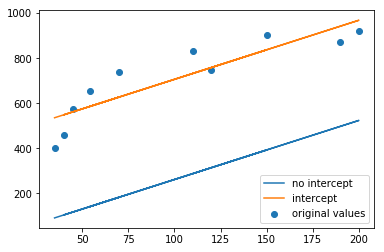

In [214]:
plt.scatter(zp, ks, label='original values')

#b = ((zp * ks).mean() - zp.mean() * ks.mean()) / (np.square(zp).mean() - np.square(zp.mean()))
b = (n * (zp * ks).sum() - zp.sum() * ks.sum()) / (n * np.square(zp).sum() - np.square(zp.sum()))

# no intercept
ks_hat_no_intercept = b * zp
mse_no_intercept = np.square(ks - ks_hat_no_intercept).sum() / n
plt.plot(zp, ks_hat_no_intercept, label='no intercept')

print(f'y = {round(b, 3)} * x')
print("mse no intercept:", mse_no_intercept)
print()

# with intercept
a = ks.mean() - b * zp.mean()

ks_hat = a + b * zp
mse = np.square(ks - ks_hat).sum() / n
plt.plot(zp, ks_hat, label='intercept')

print(f'y = {round(a, 3)} + {round(b, 3)} * x')
print("mse with intercept:", mse)


plt.legend(loc='lower right',
           ncol=1,)

plt.show()

# 2.Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [215]:
def mse_(b1, x, y, n):
    return float(np.square(np.sum(b1 * x - y)) / n)

In [216]:
alpha = 1e-5
b1 = 1

for i in range(100):
    b1 -= alpha * 2 * np.sum((b1 * zp - ks) * zp) / n

    # if i % 5 == 0:
    #     print(f'Iter {i}, B1={b1}\t, mse={mse_(b1, zp, ks, n)}')

mse_grad = mse_(b1, zp, ks, n)

print(f'y = {round(b1, 3)} * x, mse={round(mse_grad, 3)}')

y = 5.89 * x, mse=126950.268


# 3. В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?

В случае, когда данные имеют нормальное распределение и дисперсия генеральной совокупности известна, используется таблица значений функции Лапласа. В случае данных с нормальным распределением и неизвестной дисперсией генеральной совокупности используется таблица критических точек распределения Стьюдента.

# 4. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [217]:
def mse__(b0, b1, x, y, n):
    return float(np.square(np.sum(b0 + b1 * x - y)) / n)

In [218]:
alpha = 1e-5
betha = 1e-3
b1 = 1
b0 = 3

for i in range(150):
    b0 -= betha * 2 * np.sum((b0 + zp - ks) * zp) / n

    for j in range(100):
        b1 -= alpha * 2 * np.sum((b1 * zp - ks) * zp) / n
        
        # if i % 10 == 0 and j % 33 == 0:
        #     print(f'Iter {i}:{j}\t, B0={b0}\t, B1={b1}\t, mse={mse__(b0, b1, zp, ks, n)}')
        
mse_grad = mse__(b0, b1, zp, ks, n)

print(f'y = {round(b0, 3)} + {round(b1, 3)} * x, mse={round(mse_grad, 3)}')

y = 664.35 + 5.89 * x, mse=3043484.935
